<a href="https://colab.research.google.com/github/sakuna47/Diabetes_Prediction-/blob/BackEnd/Diabetes_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pandas numpy scikit-learn streamlit

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
from imblearn.over_sampling import SMOTE

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd

# Define the file path
file_path = "/content/drive/My Drive/Diabetes Prediction /diabetes.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Explore the dataset
print(df.head())
print(df.info())
print(df["Outcome"].value_counts())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [32]:
# Check for missing values
print(df.isnull().sum())

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split dataset first (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [33]:
# Identify zero values in key columns
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_to_check:
    print(f"{col}: {df[col].eq(0).sum()} zeros")



Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [34]:
from sklearn.impute import KNNImputer

# Define columns where zero values should be treated as missing
columns_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zeros with NaN
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)  # can adjust 'n_neighbors' based on data
df[columns_to_fix] = imputer.fit_transform(df[columns_to_fix])

# Check for any remaining missing values
print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [35]:
df.fillna(df.median(), inplace=True)

Outcome
0    500
1    268
Name: count, dtype: int64


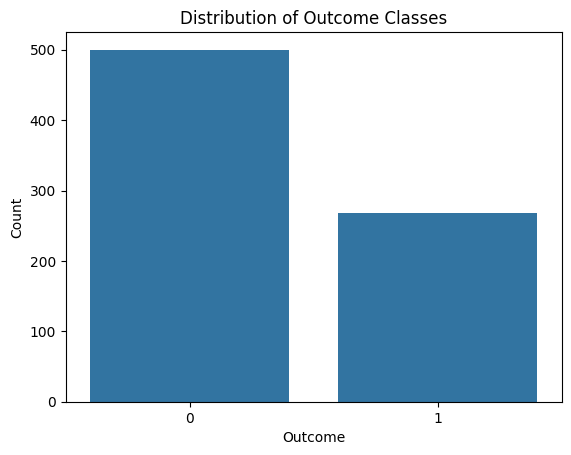

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of occurrences for each class
class_counts = df["Outcome"].value_counts()

# Print the counts
print(class_counts)

# Visualize the class distribution
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Outcome Classes")
plt.show()


Resampled Class Distribution:
Outcome
1    350
0    350
Name: count, dtype: int64


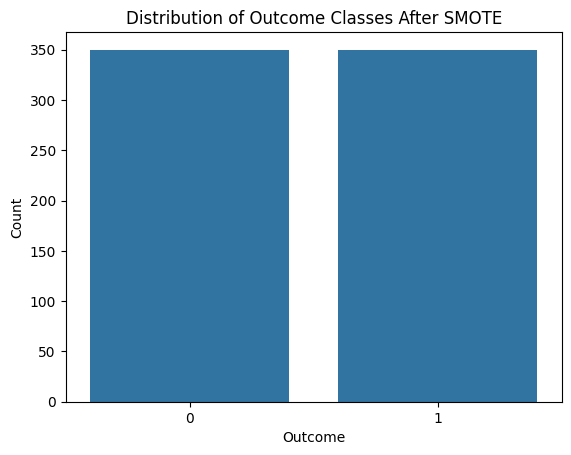

In [41]:
# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a DataFrame from the resampled data
df_resampled = pd.DataFrame(X_train_smote, columns=X.columns)  # Use original feature names
df_resampled["Outcome"] = y_train_smote  # Add the target variable

import seaborn as sns
import matplotlib.pyplot as plt

# Count the new class distribution
new_class_counts = df_resampled["Outcome"].value_counts()
print("Resampled Class Distribution:")
print(new_class_counts)

# Plot the new distribution
sns.barplot(x=new_class_counts.index, y=new_class_counts.values)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Outcome Classes After SMOTE")
plt.show()

In [38]:

from imblearn.over_sampling import SMOTE
import pandas as pd

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the feature matrix (X) and target variable (y)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame for checking class distribution
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Outcome"] = y_resampled

In [39]:
# Step 3: Train model on SMOTE data
model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=100, max_depth=5)
model.fit(X_train_smote, y_train_smote)

# Step 4: Test on original X_test
y_pred = model.predict(X_test)

# Step 5: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7619047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       150
           1       0.64      0.75      0.69        81

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.78      0.76      0.77       231



In [40]:
import os

# Define the folder path
drive_folder = "/content/drive/My Drive/Diabetes Prediction"

# Ensure the folder exists
os.makedirs(drive_folder, exist_ok=True)

# Save the model
model_path = os.path.join(drive_folder, "diabetes_model.pkl")
with open(model_path, "wb") as f:
    pickle.dump(model, f)

# Save the scaler
scaler_path = os.path.join(drive_folder, "scaler.pkl")
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print(f"Model saved at: {model_path}")
print(f"Scaler saved at: {scaler_path}")

Model saved at: /content/drive/My Drive/Diabetes Prediction/diabetes_model.pkl
Scaler saved at: /content/drive/My Drive/Diabetes Prediction/scaler.pkl
